In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
casas = pd.read_csv('houses_Madrid.csv')

In [51]:
casas.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [52]:
casas.shape

(21742, 58)

In [53]:
casas.drop(columns=['Unnamed: 0'], inplace=True)
casas.set_index('id', inplace=True)
casas

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,True,True,True
3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,NaN,NaN,...,E,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN


In [54]:
casas.columns

Index(['title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orien

In [55]:
casas.size

1217552

In [56]:
casas.info

<bound method DataFrame.info of                                                    title  \
id                                                         
21742              Piso en venta en calle de Godella, 64   
21741   Piso en venta en calle de la del Manojo de Rosas   
21740               Piso en venta en calle del Talco, 68   
21739               Piso en venta en calle Pedro Jiménez   
21738  Piso en venta en carretera de Villaverde a Val...   
...                                                  ...   
5           Ático en venta en Casco Histórico de Barajas   
4      Piso en venta en Urb. Campo de las Naciones - ...   
3      Piso en venta en Campo de las Naciones-Corralejos   
2          Chalet adosado en venta en calle Burriana, 12   
1                 Piso en venta en calle San Epifanio, 9   

                                       subtitle  sq_mt_built  sq_mt_useful  \
id                                                                           
21742                     San C

In [57]:
casas.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.0,100.0,162.0,999.0
sq_mt_useful,8228.0,103.458192,88.259192,1.0,59.0,79.0,113.0,998.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.0,3.0,4.0,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.0,2.0,2.0,16.0
n_floors,1437.0,3.128740,0.907713,1.0,2.0,3.0,4.0,7.0
sq_mt_allotment,1432.0,241.692737,247.484853,1.0,2.0,232.0,354.0,997.0
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
door,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
casas.duplicated().sum()

179

In [59]:
casas.isnull().sum()

title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price_known                  0
house_type_i

In [60]:
#removing attributes that wouldnt be neededfor our 
casas.drop(columns=['title', 'subtitle', 'sq_mt_useful','n_floors', 
       'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east','is_furnished'], inplace=True)

In [61]:
casas.head()

,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,is_new_development
id,,,,,,
21742,64.0,2,1.0,471,85000,False
21741,70.0,3,1.0,666,129900,False
21740,94.0,2,2.0,722,144247,False
21739,64.0,2,1.0,583,109900,False
21738,108.0,2,2.0,1094,260000,False


In [62]:
casas.dtypes

sq_mt_built           float64
n_rooms                 int64
n_bathrooms           float64
rent_price              int64
buy_price               int64
is_new_development     object
dtype: object

In [63]:
casa = casas.astype('category')

In [64]:
from sklearn.preprocessing import LabelEncoder
casa = casa.apply(LabelEncoder().fit_transform)

In [65]:
casa.dtypes

sq_mt_built           int64
n_rooms               int64
n_bathrooms           int64
rent_price            int64
buy_price             int64
is_new_development    int64
dtype: object

In [66]:
casa.rename(columns= {'sq_mt_built':'metros', 'n_rooms':'habitaciones', 'n_bathrooms':'baños', 'rent_price':'precio alquiler', 'buy_price':'precio venta', 'is_new_development':'nuevo'}, inplace=True)

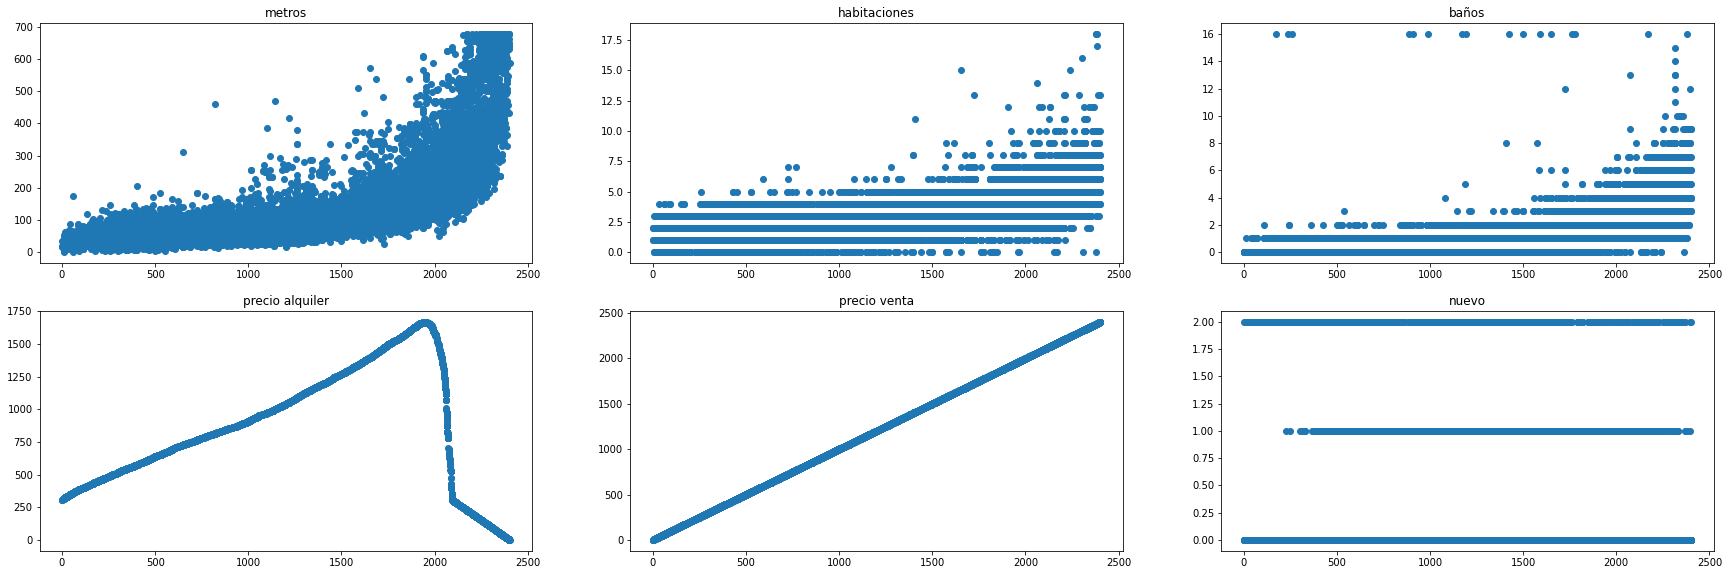

In [67]:
plt.figure(figsize=(30,15))
for i in range(len(casa.columns)):
  plt.subplot(3,3,i+1)
  plt.scatter(casa['precio venta'],casa.iloc[:,i])
  plt.title(casa.columns[i])

plt.show()

<AxesSubplot:xlabel='nuevo', ylabel='count'>

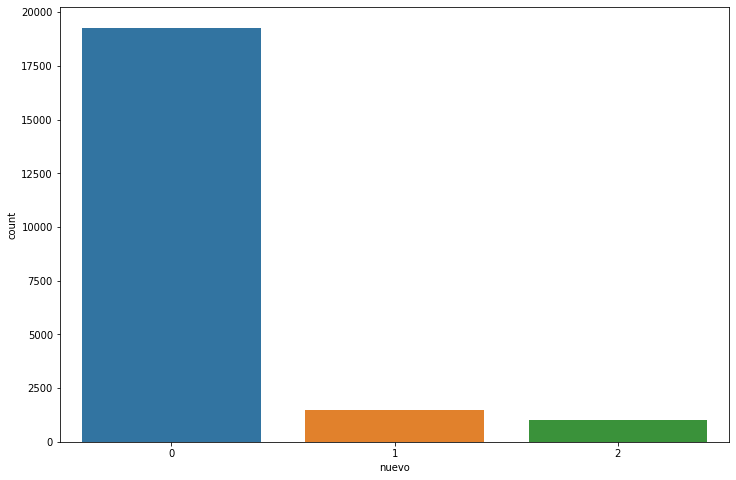

In [68]:
# The quantity of listings which are newly developed vs those which are olden.
plt.figure(figsize=(12,8))
sns.countplot(x='nuevo', data=casa)

<AxesSubplot:xlabel='baños', ylabel='count'>

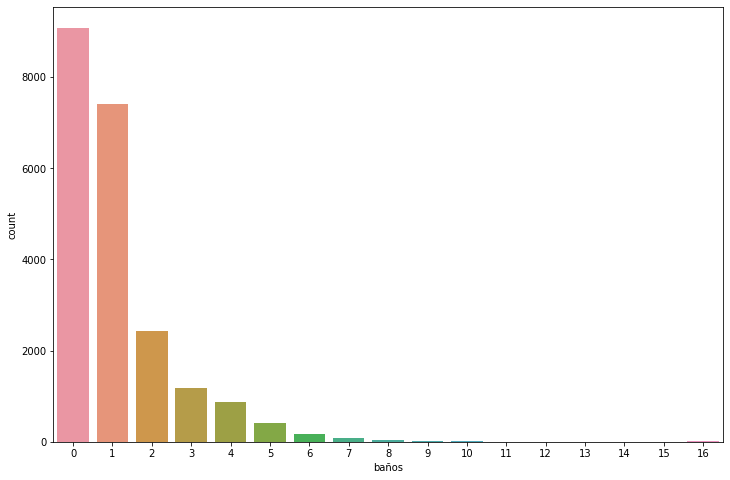

In [69]:
# Frequency of Bathrooms
plt.figure(figsize=(12,8))
sns.countplot(x='baños', data=casa)

<AxesSubplot:xlabel='habitaciones', ylabel='count'>

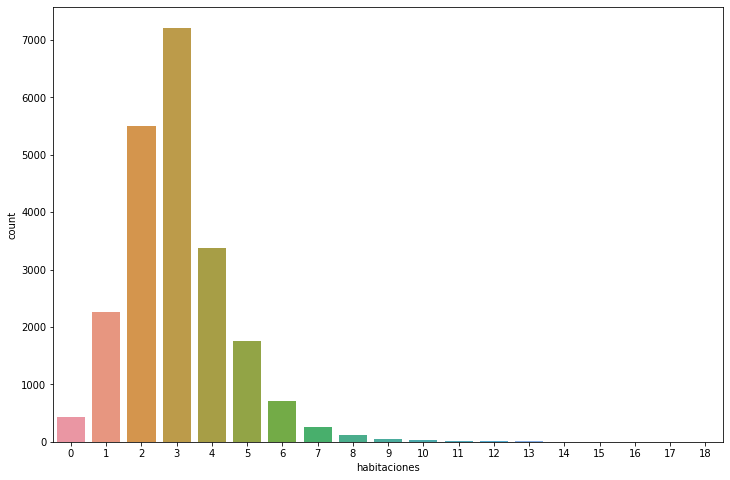

In [70]:
# Frequency of Bathrooms
plt.figure(figsize=(12,8))
sns.countplot(x='habitaciones', data=casa)

In [71]:
corr = casa.corr()
corr

,metros,habitaciones,baños,precio alquiler,precio venta,nuevo
metros,1.000000,0.751392,0.847624,-0.196563,0.735037,-0.057056
habitaciones,0.751392,1.000000,0.693410,-0.026546,0.595066,-0.061416
baños,0.847624,0.693410,1.000000,-0.091040,0.706737,-0.037945
precio alquiler,-0.196563,-0.026546,-0.091040,1.000000,0.278618,0.005221
precio venta,0.735037,0.595066,0.706737,0.278618,1.000000,-0.058890
nuevo,-0.057056,-0.061416,-0.037945,0.005221,-0.058890,1.000000


In [72]:
casa.corr()['precio venta'].sort_values(ascending=False)

precio venta       1.000000
metros             0.735037
baños              0.706737
habitaciones       0.595066
precio alquiler    0.278618
nuevo             -0.058890
Name: precio venta, dtype: float64

<AxesSubplot:>

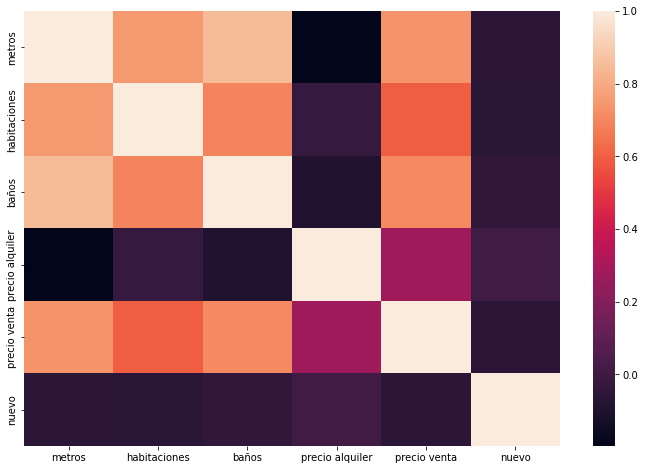

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

<AxesSubplot:xlabel='metros'>

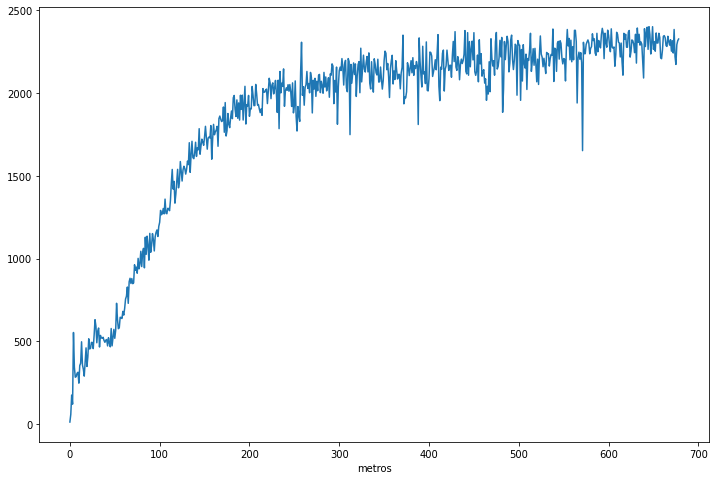

In [74]:
# Visualization of the trend between buy-prices and square metres
plt.figure(figsize=(12,8))
casa.groupby('metros').mean()['precio venta'].plot()

<AxesSubplot:xlabel='baños', ylabel='precio venta'>

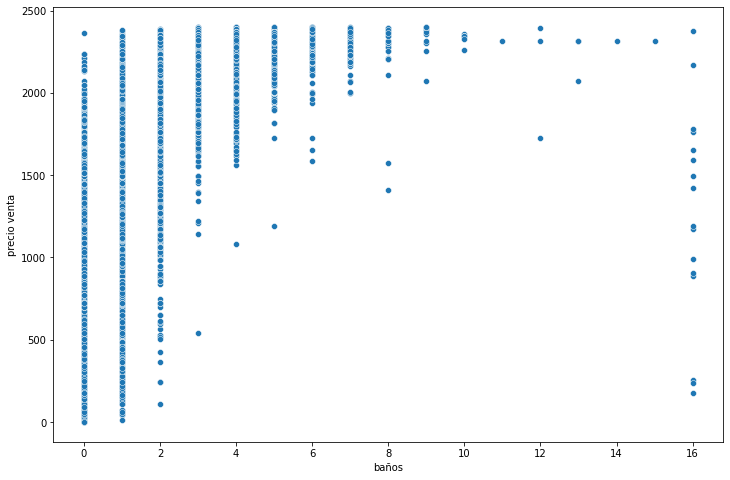

In [75]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='baños', y='precio venta', data=casa)

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_35614/3249695331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(casa['precio venta'],bins=30)


<AxesSubplot:xlabel='precio venta', ylabel='Density'>

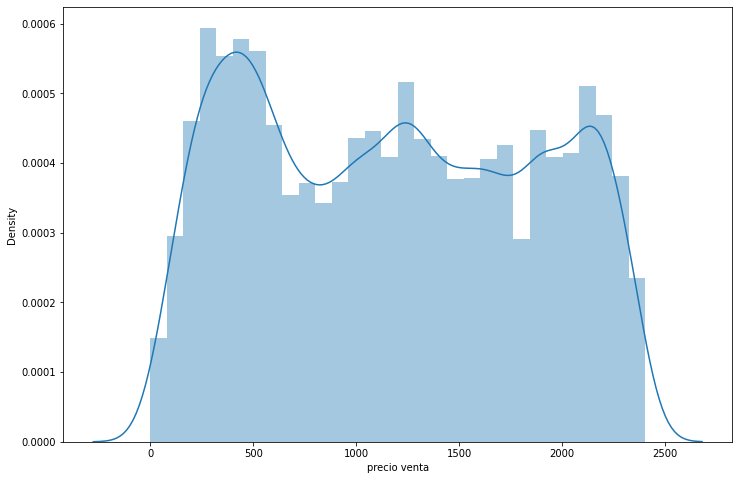

In [76]:
plt.figure(figsize=(12,8))
sns.distplot(casa['precio venta'],bins=30)

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_35614/3101946990.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(casa['metros'],bins=30)


<AxesSubplot:xlabel='metros', ylabel='Density'>

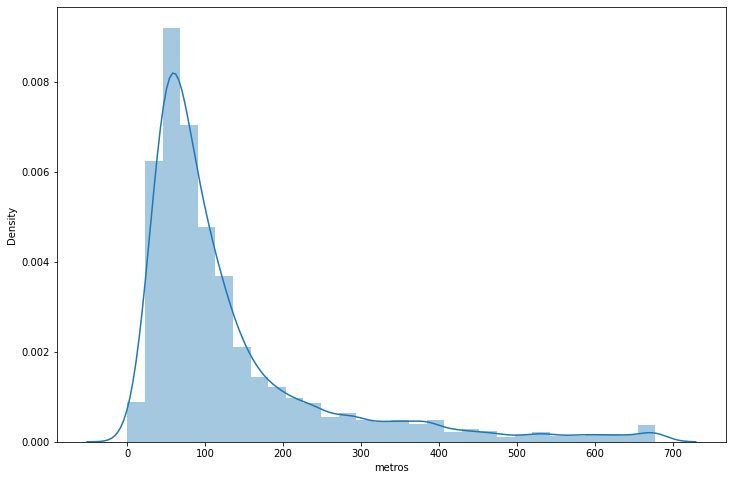

In [77]:
plt.figure(figsize=(12,8))
sns.distplot(casa['metros'],bins=30)

<AxesSubplot:xlabel='metros', ylabel='precio venta'>

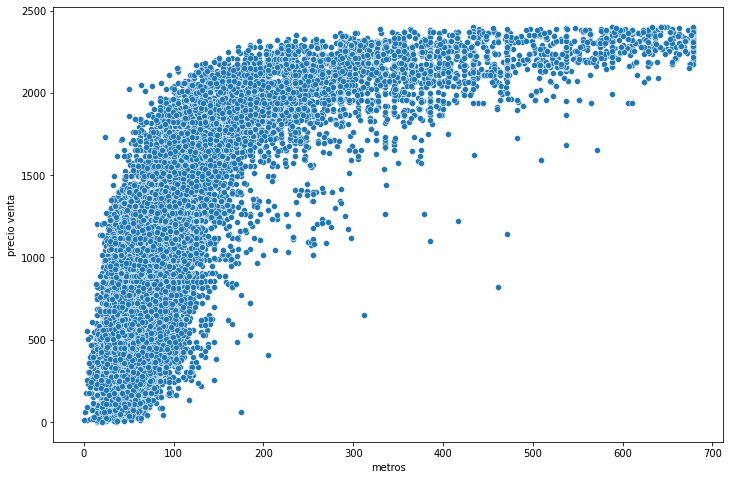

In [78]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='metros', y='precio venta', data=casa)

<AxesSubplot:xlabel='habitaciones', ylabel='precio venta'>

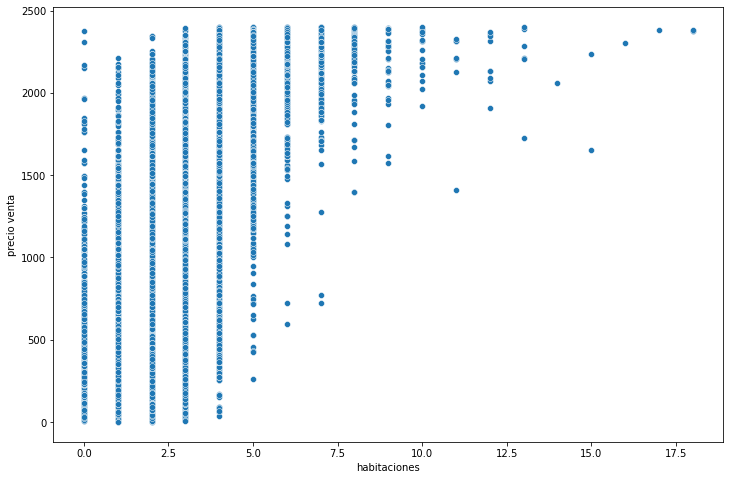

In [79]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='habitaciones', y='precio venta', data=casa)

In [80]:
casa.sort_values('habitaciones', ascending=False).head(20)

,metros,habitaciones,baños,precio alquiler,precio venta,nuevo
id,,,,,,
7169,611,18,3,18,2384,0
7452,582,18,3,24,2378,0
7518,582,18,3,24,2378,0
6484,611,17,6,18,2384,0
14905,678,16,9,100,2302,0
5282,375,15,6,1395,1652,0
6127,525,15,1,164,2238,0
3285,192,14,3,1120,2060,0
12347,482,13,12,1468,1725,0


<AxesSubplot:xlabel='metros'>

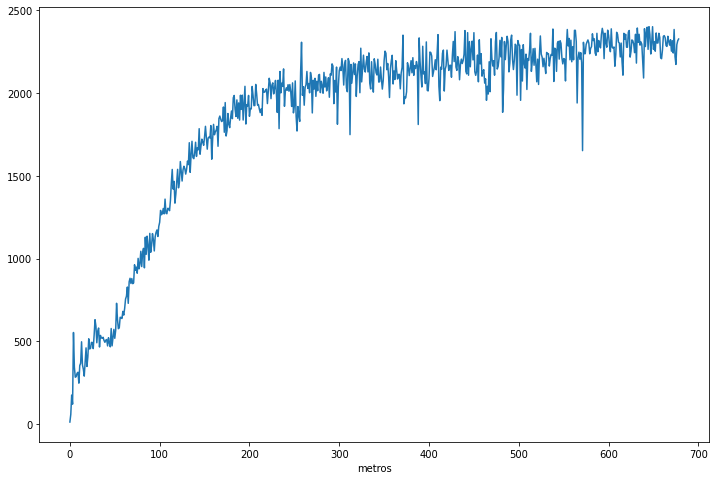

In [81]:
plt.figure(figsize=(12,8))
casa.groupby('metros').mean()['precio venta'].plot()

<AxesSubplot:xlabel='baños', ylabel='precio venta'>

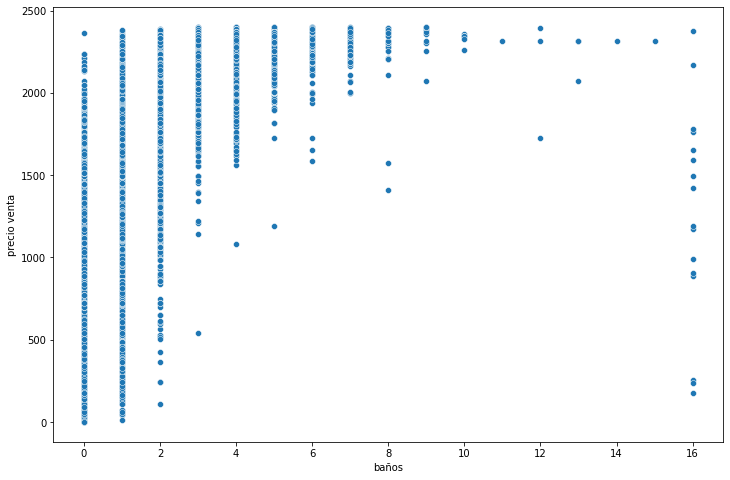

In [82]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='baños', y='precio venta', data=casa)

<AxesSubplot:xlabel='habitaciones', ylabel='precio venta'>

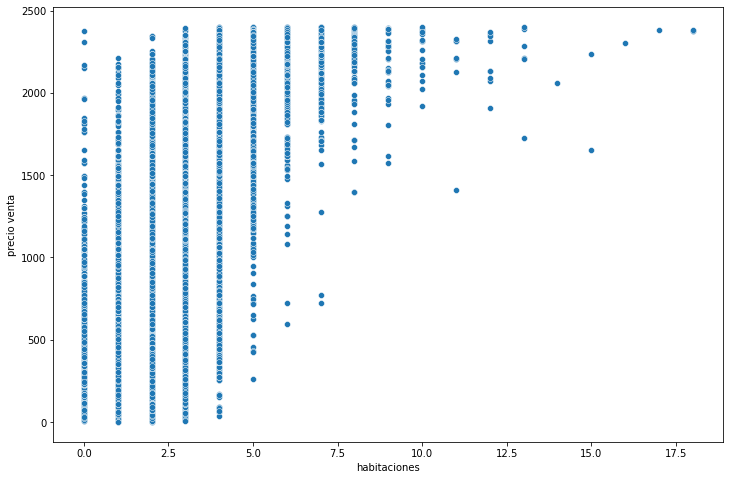

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='habitaciones', y='precio venta', data=casa)

In [84]:
x = casa.drop(columns=['precio venta','precio alquiler'])
y = casa['precio venta']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test =train_test_split(x, y, random_state=5, test_size=0.2)

In [87]:
print(x.shape, x_test.shape, x_train.shape)

(21742, 4) (4349, 4) (17393, 4)


In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [89]:
lr_simple = LinearRegression()

In [90]:
lr_simple.fit(x, y)

LinearRegression()

In [92]:
solucion_1=[lr_simple.intercept_,lr_simple.coef_,lr_simple.score(x, y)]

solucion_1

[644.9726504739273,
 array([  2.380851  ,  27.23809101, 132.37212016, -26.9678744 ]),
 0.5671091112405087]

In [93]:
model.fit(x_train, y_train)

LinearRegression()

In [94]:
model.intercept_

652.5111700039961

In [95]:
model.coef_

array([  2.35616654,  24.58261016, 135.67041711, -29.47848673])

In [96]:
predictions = model.predict(x_test)

In [97]:
predictions

array([ 781.78605263, 1181.03284506, 1062.20357336, ...,  965.73147878,
        819.48471725,  825.21799509])

In [98]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test, predictions)

376.87098531921896

In [99]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test, predictions)

195730.4663103277

In [100]:
np.sqrt(mean_squared_error(y_test, predictions))


442.41436042507445

In [103]:
casa['precio venta'].describe()

count    21742.000000
mean      1182.637062
std        677.567489
min          0.000000
25%        553.000000
50%       1181.000000
75%       1777.750000
max       2402.000000
Name: precio venta, dtype: float64

In [104]:
6.445759e+05

644575.9

In [105]:
100*219176.99493543775/644575.9

34.00328726771164

In [106]:
from sklearn.metrics import explained_variance_score


explained_variance_score(y_test, predictions)

0.5636665211659728

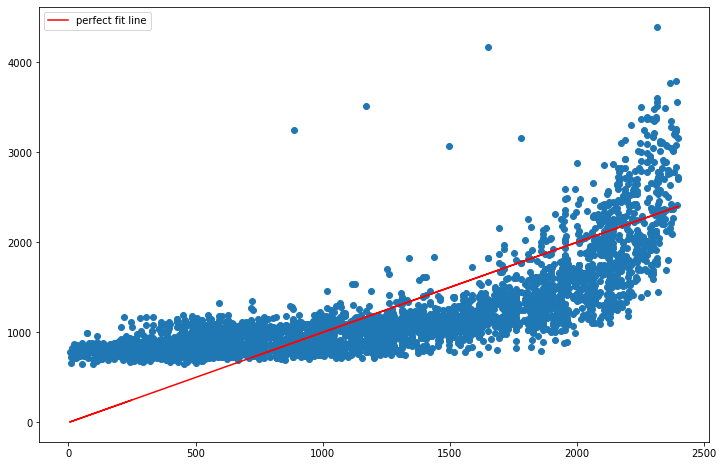

In [107]:
plt.figure(figsize=(12,8))

# Our predictions
plt.scatter(y_test, predictions);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

In [108]:
score = model.score(x_test, y_test)
print('Test accuracy:',(score)*100)

Test accuracy: 56.36547482918557


In [109]:
#CON XGBoost

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=123)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)
clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)
clf_lr = LR().fit(X_train, y_train)
accuracy_xgb = float(np.sum(preds_xgb == y_test))/y_test.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)
accuracy_lr = clf_lr.score(X_test, y_test)
print('Accuracy de Logistic Regression: ', accuracy_lr)

NameError: name 'X' is not defined

In [111]:
#Regresión lineal polinómica

In [112]:
#Crea el modelo polinomial de grado 2
from sklearn.preprocessing import PolynomialFeatures 
pf1 = PolynomialFeatures(degree = 2)
x_array=casa.to_numpy()

X1 = pf1.fit_transform(x_array.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_lineal1 = LinearRegression() 
regresion_lineal1.fit(X1, y) 
print(regresion_lineal1.coef_,regresion_lineal1.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [130452, 21742]

In [113]:
#Crea el modelo polinomial de grado 3
pf2 = PolynomialFeatures(degree = 3)  

X2 = pf2.fit_transform(x_array.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_lineal2 = LinearRegression() 
regresion_lineal2.fit(X2, y) 
print(regresion_lineal2.coef_,regresion_lineal2.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [130452, 21742]

In [114]:
solucion_2=[regresion_lineal1.intercept_,regresion_lineal1.coef_,regresion_lineal1.score(X1, y)]

print(solucion_2)

solucion_2b=[regresion_lineal2.intercept_,regresion_lineal2.coef_,regresion_lineal2.score(X2, y)]

print(solucion_2b)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [115]:
df=pd.DataFrame({
    'modelo':['simple','grado 2','grado 3', 'multivariable'],
    'ecuacion':['precio = 43980.6282 + 42054.0749 · median_income','precio = 18920.2047 + 53649.40 · median_income - 1066.6515 · median_income^2',' precio = 75138.9431 +15095.0888· median_income + 6050.3056 · median_income^2 - 353.9104 · median_income^3','precio = - 3620600.8930 - 43139.6373 · longitude - 42925.6731 · latitude + 1150.6950 · housing_median_age - 8.3782 · total_rooms + 117.6485 · total_bedrooms + 43794.5527 - 38.4888 · population + 45.4360 · households + 40507.0684 · median_income'],
    'score':[0.479,0.483,0.491,0.641]
})
df

,modelo,ecuacion,score
0,simple,precio = 43980.6282 + 42054.0749 · median_income,0.479
1,grado 2,precio = 18920.2047 + 53649.40 · median_income...,0.483
2,grado 3,precio = 75138.9431 +15095.0888· median_incom...,0.491
3,multivariable,precio = - 3620600.8930 - 43139.6373 · longitu...,0.641
